In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_excel("p34.xlsx")

In [3]:
# Exibir as primeiras linhas do dataframe
df.head()

,cliente,ECIV,ESCOLARIDADE,IDADE,NATUREZA,PROFISSAO,SEXO,RENDA,UF,STATUS
0,C_12664,casado,secundario,18,1,9,F,14.69,SP,bom
1,C_9694,casado,secundario,18,5,9,M,40.35,SP,bom
2,C_10624,casado,superior,18,1,8,F,24.16,SP,bom
3,C_12230,casado,pos_grad,18,1,8,M,20.74,SP,bom
4,C_21910,casado,secundario,18,1,3,F,50.19,SP,bom


In [4]:
# Verificar valores nulos
print("Valores nulos por coluna:\n", df.isnull().sum())

Valores nulos por coluna:
 cliente         0
ECIV            0
ESCOLARIDADE    0
IDADE           0
NATUREZA        0
PROFISSAO       0
SEXO            0
RENDA           0
UF              0
STATUS          0
dtype: int64


In [5]:
# Unindo estados com menos de 20 registros na categoria "Outros"
counts = df["UF"].value_counts()

small = counts[counts < 20].index

df["UF"] = df["UF"].where(~df["UF"].isin(small), "Outros")
df["UF"].value_counts()

UF
SP        33451
MG         1841
Outros       39
Name: count, dtype: int64

In [6]:
# Garantir que colunas categóricas sejam strings
for col in ["NATUREZA", "PROFISSAO"]:
    df[col] = df[col].astype(str)

In [7]:
# Remover outliers
from scipy import stats


num_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[num_cols], nan_policy="omit"))
df_clean = df[(z_scores < 3).all(axis=1)]

In [8]:
# Codificação das variáveis categóricas
label_encoders = {}
for col in ["ECIV", "ESCOLARIDADE", "NATUREZA", "PROFISSAO", "SEXO", "UF", "STATUS"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(label_encoders)

{'ECIV': LabelEncoder(), 'ESCOLARIDADE': LabelEncoder(), 'NATUREZA': LabelEncoder(), 'PROFISSAO': LabelEncoder(), 'SEXO': LabelEncoder(), 'UF': LabelEncoder(), 'STATUS': LabelEncoder()}


In [9]:
# Separar variáveis independentes e dependentes
X = df.drop(["cliente ", "STATUS"], axis=1)
y = df["STATUS"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criar e treinar o modelo de Árvore de Decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [10]:
# Previsão
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Matriz de Confusão:
 [[5890  963]
 [ 874 2873]]
Acurácia: 0.8266981132075472
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      6853
           1       0.75      0.77      0.76      3747

    accuracy                           0.83     10600
   macro avg       0.81      0.81      0.81     10600
weighted avg       0.83      0.83      0.83     10600



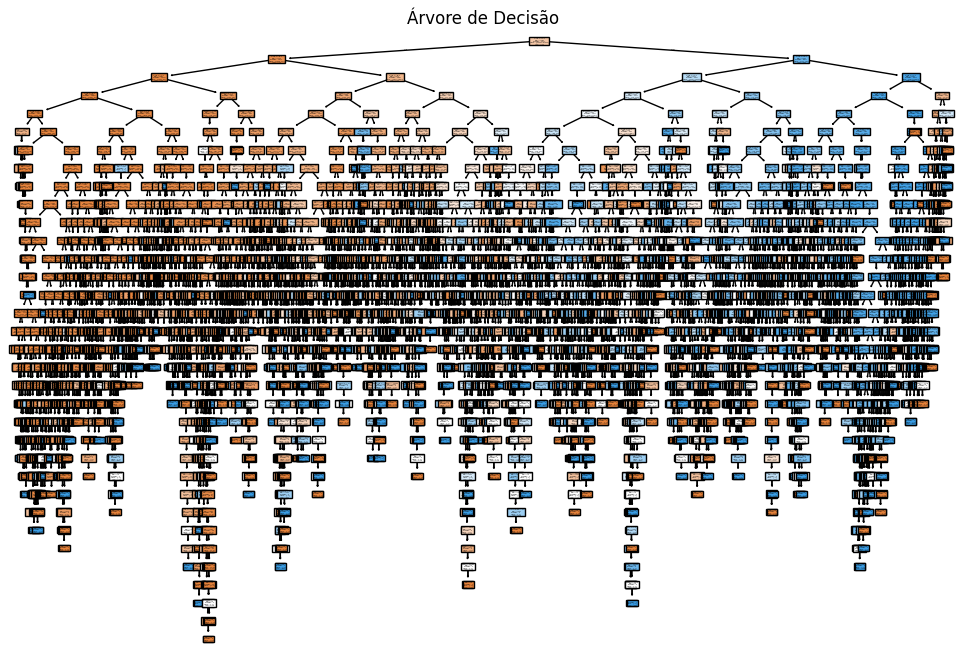

In [13]:
# Visualizar a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=[str(c) for c in label_encoders["STATUS"].classes_],
)
plt.title("Árvore de Decisão")
plt.show()